<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%204/Modulo_4_Ejercicio_4_Optimizaci%C3%B3n_M%C3%A9tricas_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 4: Optimización de Métricas y Selección de Modelos**

#### Optimización de un modelo de clasificación multiclase para defectos en productos electrónicos

### **Introducción**
En este ejercicio, exploraremos cómo optimizar un modelo de clasificación multiclase y seleccionar la mejor métrica de evaluación.

El dataset contiene información sobre defectos en productos electrónicos, con 4 categorías de defecto. Aplicaremos técnicas como **SMOTE para balanceo de clases**, **selección de características**, y **Random Forest** para mejorar la precisión en la clasificación. Evaluaremos el modelo con **Precisión, Recall, F1 Score, Exactitud** y compararemos **F1 Score Macro vs Micro y la Curva ROC para clasificación multiclase**.

In [27]:
# Celda 1: Carga de librerías y configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, label_binarize
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc)
from sklearn.preprocessing import label_binarize

# Configuración de gráficos
sns.set(style='whitegrid')

In [28]:
# Celda 2: Carga del dataset
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/defectos_productos.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_producto,Voltaje_prueba,Corriente_operacion,Temperatura_ambiente,Tiempo_prueba,Frecuencia_trabajo,Material_encapsulado,Proveedor,Defecto
0,1,9.150115,4.742518,25.530115,2.994613,63.985466,Plástico,Z,Mal ensamblado
1,2,10.008079,3.499830,27.452935,31.319903,1491.344155,Cerámica,Z,Mal ensamblado
2,3,7.962450,3.179779,23.636370,30.547971,4157.623317,Plástico,Z,Sin defecto
3,4,3.475670,0.735378,17.409543,56.466100,4843.639813,Cerámica,Z,Sobrecalentamiento
4,5,4.902504,4.343243,26.302373,43.660205,713.642966,Plástico,Y,Sobrecalentamiento


In [29]:
# Celda 3: Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_producto           75000 non-null  int64  
 1   Voltaje_prueba        75000 non-null  float64
 2   Corriente_operacion   75000 non-null  float64
 3   Temperatura_ambiente  75000 non-null  float64
 4   Tiempo_prueba         75000 non-null  float64
 5   Frecuencia_trabajo    75000 non-null  float64
 6   Material_encapsulado  75000 non-null  object 
 7   Proveedor             75000 non-null  object 
 8   Defecto               75000 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 5.1+ MB


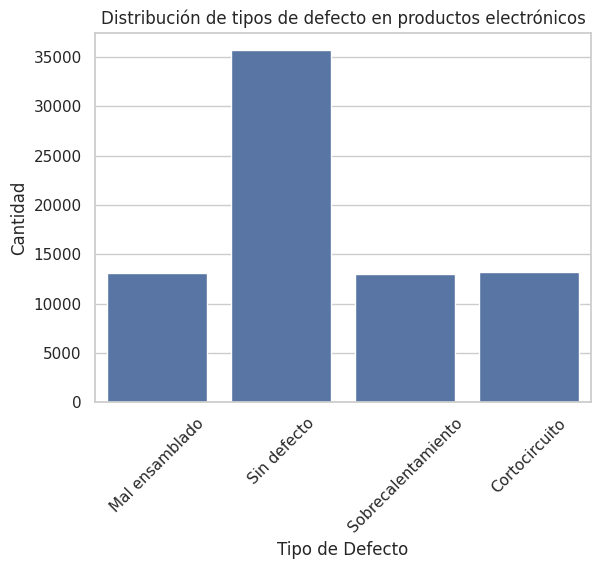

In [30]:
# Celda 4: Distribución de la variable objetivo
sns.countplot(x='Defecto', data=data)
plt.title('Distribución de tipos de defecto en productos electrónicos')
plt.xlabel('Tipo de Defecto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### **Preprocesamiento de los datos**
Se realizará un proceso de preparación de datos que incluye:
- **Balanceo de clases con SMOTE** para mejorar la detección de todas las clases.
- **Selección de características** para eliminar variables no relevantes.
- **Codificación de variables categóricas y normalización de variables numéricas**.

In [31]:
# Celda 5: Procesamiento de datos
# Eliminar duplicados
data = data.drop_duplicates()

# Imputar valores faltantes con la mediana para variables numéricas
numeric_features = ['Voltaje_prueba', 'Corriente_operacion', 'Temperatura_ambiente', 'Tiempo_prueba', 'Frecuencia_trabajo']
imputer = SimpleImputer(strategy='median')
data[numeric_features] = imputer.fit_transform(data[numeric_features])

# Codificar variables categóricas con OneHotEncoder
categorical_features = ['Material_encapsulado', 'Proveedor']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Codificar la variable objetivo
label_encoder = LabelEncoder()
data['Defecto'] = label_encoder.fit_transform(data['Defecto'])

# División en variables predictoras y objetivo
X = data.drop(columns=['Defecto'])
y = data['Defecto']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicación de SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Celda 6: Entrenamiento del modelo con Random Forest
modelo = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [33]:
# Celda 7: Evaluación del modelo
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

     Cortocircuito       0.82      0.26      0.40      2640
    Mal ensamblado       0.85      0.52      0.65      2619
       Sin defecto       0.55      0.78      0.64      7132
Sobrecalentamiento       0.20      0.19      0.20      2609

          accuracy                           0.54     15000
         macro avg       0.61      0.44      0.47     15000
      weighted avg       0.59      0.54      0.52     15000



In [34]:
# Celda 8: Extraemos las métricas principales
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n\nExactitud (Accuracy):", round(accuracy_score(y_test, y_pred), 4))

Confusion Matrix:
 [[ 688   37 1570  345]
 [  14 1362 1006  237]
 [  96  150 5538 1348]
 [  37   47 2030  495]]


Exactitud (Accuracy): 0.5389


### F1 Macro vs F1 Micro

> **F1 Micro:**

*   Calcula las métricas globales contando todos los verdaderos positivos, falsos positivos y falsos negativos juntos.

*   Es como tratar todas las clases como si fueran una sola gran clase.

*   Pondera más las clases grandes (frecuentes).

*   Útil cuando importa más el rendimiento global, sin importar la clase.

Ejemplo práctico:
Si una clase representa el 90% de los datos, tendrá mucho peso en el F1 micro, incluso si las demás clases se clasifican mal.

> F1 Macro

*   Calcula F1 individual para cada clase y luego hace el promedio (media aritmética).

*   No tiene en cuenta el tamaño de las clases.

*   Trata por igual a todas las clases, incluso si una clase tiene solo 5 ejemplos.

*   Útil si te importa el rendimiento en todas las clases por igual, incluso en las minoritarias.

Ejemplo práctico:
Si tu modelo va muy bien en las clases mayoritarias pero falla en las minoritarias, el F1 macro te lo penalizará.


In [35]:
# Celda 9: Comparar F1 Macro vs Micro
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro:", round(f1_macro, 4))
print("F1 Micro:", round(f1_micro, 4))

F1 Macro: 0.47
F1 Micro: 0.5389


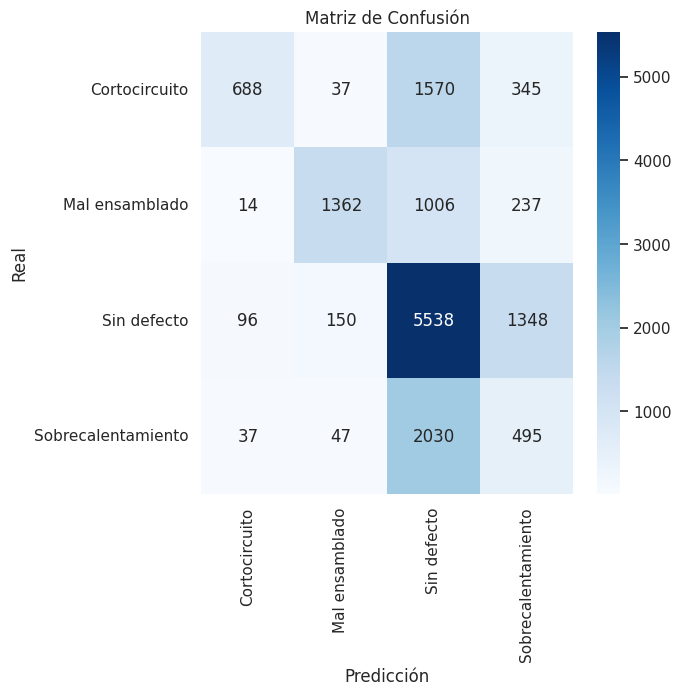

In [36]:
# Celda 10: Visualización de resultados

# Matriz de Confusión
plt.figure(figsize=(6,6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

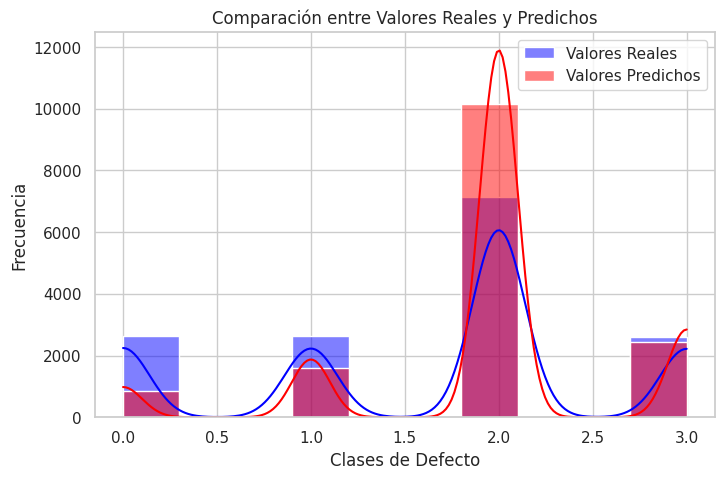

In [37]:
# Celda 11: Comparación entre clases reales y predichas
plt.figure(figsize=(8,5))
sns.histplot(y_test, color="blue", label="Valores Reales", kde=True, bins=10)
sns.histplot(y_pred, color="red", label="Valores Predichos", kde=True, bins=10)
plt.legend()
plt.title("Comparación entre Valores Reales y Predichos")
plt.xlabel("Clases de Defecto")
plt.ylabel("Frecuencia")
plt.show()

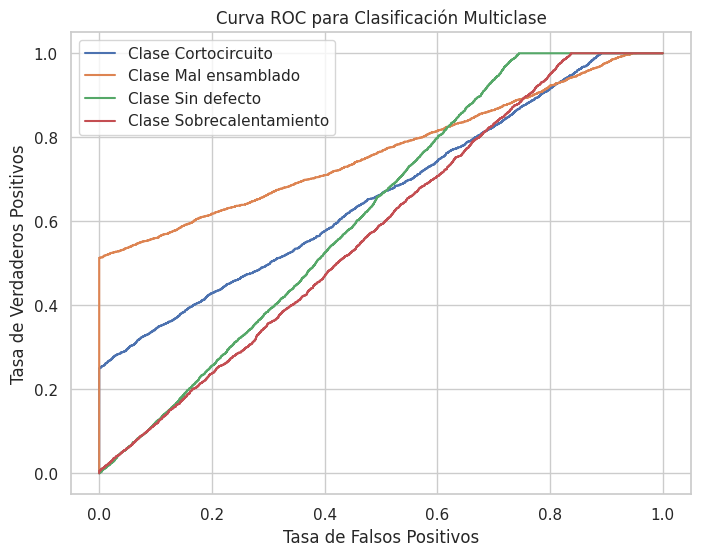

In [38]:
# Curva ROC Multiclase
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_proba = modelo.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i, label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Clase {label}')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Clasificación Multiclase')
plt.legend()
plt.show()

### **Conclusiones**
- Se implementó **SMOTE** para mejorar la detección de clases minoritarias y equilibrar el dataset.
- **Random Forest** genero buenas predicciones gracias a su capacidad de generalización y manejo de datos no lineales.
- **El F1 Score Macro vs Micro** permite entender cómo el modelo trata clases balanceadas y desbalanceadas. El **F1 Macro** evalúa el rendimiento en todas las clases por igual, mientras que el **F1 Micro** pondera según la cantidad de muestras en cada clase.
- **La Curva ROC-AUC multiclase** permitió analizar la capacidad del modelo para distinguir correctamente entre diferentes defectos.

### **Posibles Mejoras**
- **Ajuste de hiperparámetros**: Se puede optimizar el modelo utilizando **GridSearchCV** para encontrar los mejores valores de `n_estimators`, `max_depth`, y otros parámetros.
- **Exploración de otros modelos**: Probar modelos más avanzados como **XGBoost o LightGBM**, que pueden ofrecer mejores resultados en tareas de clasificación complejas.
- **Ingeniería de características**: Crear nuevas variables derivadas de las existentes para mejorar la capacidad predictiva del modelo.
- **Manejo avanzado de datos desbalanceados**: Probar otras técnicas como **BalancedRandomForestClassifier** o **focal loss** para mejorar la detección de defectos minoritarios.
- **Reducción de dimensionalidad**: Aplicar **PCA** para evaluar si la reducción de dimensiones mejora la eficiencia del modelo sin afectar significativamente el rendimiento.
